# EDA Route Data

## Overview

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy

ROUTE_DATA_PROCESSED_DATASET_PATH = "../datasets/processed/eval_route_data_formatted.json"

df_eval_route = pd.read_json(ROUTE_DATA_PROCESSED_DATASET_PATH)

# Specify columns to exclude from filling NaN
exclude_columns = ["station_code", "date_YYYY_MM_DD", "departure_time_utc", "executor_capacity_cm3", "Zone"]

# Fill NaN values with 0 only for columns not in the exclude_columns list
df_eval_route[df_eval_route.columns.difference(exclude_columns)] = df_eval_route[df_eval_route.columns.difference(exclude_columns)].fillna(0)

df_eval_route

ModuleNotFoundError: No module named 'scipy'

In [ ]:
def calculate_entropy(column):
    # Use the value_counts() method to get the count of each unique value
    value_counts = column.value_counts()

    # Calculate the probabilities for each unique value
    probabilities = value_counts / len(column)

    # Use the entropy function to calculate entropy
    return entropy(probabilities, base=2)  # base=2 for binary entropy

In [16]:
df_eval_route.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3052 entries, 0 to 3051
Columns: 681 entries, RouteID to XV
dtypes: float64(676), object(5)
memory usage: 15.9+ MB


In [17]:
df_eval_route.describe()

,executor_capacity_cm3,AH,AJ,AL,AN,AP,AS,AY,BA,BB,...,XX,AE,PP,UO,RM,SZ,BH,LX,VP,XV
count,3.052000e+03,3052.000000,3052.000000,3052.000000,3052.000000,3052.000000,3052.000000,3052.000000,3052.000000,3052.000000,...,3052.000000,3052.000000,3052.000000,3052.000000,3052.000000,3052.000000,3052.000000,3052.000000,3052.000000,3052.000000
mean,3.670335e+06,0.241481,0.238204,0.227064,0.214613,0.207405,0.255898,0.212320,0.250000,0.228047,...,0.192333,0.239515,0.231651,0.224115,0.211009,0.244430,0.191350,0.200852,0.188073,0.184142
std,4.860622e+05,0.430342,0.426055,0.426754,0.410621,0.415100,0.459127,0.409017,0.433084,0.441712,...,0.398333,0.429918,0.425823,0.417067,0.408092,0.429819,0.393428,0.400703,0.391673,0.399324
min,3.114853e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.313071e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.539606e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.247527e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.672280e+06,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000


## Missing Values

In [18]:
df = df_eval_route
# Check for missing values in the DataFrame
missing_values = df.isnull()

# Count missing values in each column
missing_count = df.isnull().sum()

# Calculate the percentage of missing values in each column
missing_percentage = (df.isnull().mean() * 100).round(2)

# Check if there are any missing values in the DataFrame
any_missing = df.isnull().values.any()

# Print the results
print("\nMissing Value Count in Each Column:")
print(missing_count)
print("\nMissing Value Percentage in Each Column:")
print(missing_percentage)
print("\nAny Missing Values in DataFrame?")
print(any_missing)


Missing Value Count in Each Column:
RouteID                  0
station_code             0
date_YYYY_MM_DD          0
departure_time_utc       0
executor_capacity_cm3    0
                        ..
SZ                       0
BH                       0
LX                       0
VP                       0
XV                       0
Length: 681, dtype: int64

Missing Value Percentage in Each Column:
RouteID                  0.0
station_code             0.0
date_YYYY_MM_DD          0.0
departure_time_utc       0.0
executor_capacity_cm3    0.0
                        ... 
SZ                       0.0
BH                       0.0
LX                       0.0
VP                       0.0
XV                       0.0
Length: 681, dtype: float64

Any Missing Values in DataFrame?
True


## Analyzing Categorical  and Numerical Variables

In [19]:
df_eval_route_categorical = df_eval_route.copy()

In [20]:
df_eval_route_categorical = df_eval_route_categorical.drop('executor_capacity_cm3', axis=1)

In [21]:
df_eval_route_numerical = df_eval_route["executor_capacity_cm3"]

In [22]:
for c in df_eval_route_categorical:
  print(c)
  print(df_eval_route[c].unique())
  print(df_eval_route[c].nunique())
  print('\n')

RouteID
['RouteID_00092558-dece-4fb7-8d0d-7d0df3a4864e'
 'RouteID_00337a3a-19c6-4821-9350-ad3cf0532047'
 'RouteID_0034b931-97a7-485f-a6b3-b22798489094' ...
 'RouteID_fedf4c2f-2618-4598-bfb5-ec90822c9a29'
 'RouteID_ff30c100-6266-461d-9c56-939775a1defe'
 'RouteID_ffdd3b7f-9de4-4a0b-8c07-d186bf7f2dee']
3052


station_code
['DLA8' 'DLA4' 'DSE4' 'DLA3' 'DLA9' 'DAU1' 'DLA7' 'DCH4' 'DBO3' 'DSE2'
 'DCH3' 'DCH1' 'DCH2' 'DLA5' 'DBO2' 'DSE5' 'DBO1' 'DBO6']
18


date_YYYY_MM_DD
['2018-06-17' '2018-09-03' '2018-09-19' '2018-07-02' '2018-07-11'
 '2018-07-18' '2018-06-13' '2018-09-29' '2018-06-19' '2018-09-15'
 '2018-07-01' '2018-06-16' '2018-07-05' '2018-06-07' '2018-06-05'
 '2018-09-23' '2018-06-02' '2018-08-27' '2018-06-12' '2018-06-26'
 '2018-08-31' '2018-06-09' '2018-09-26' '2018-06-20' '2018-09-27'
 '2018-09-14' '2018-06-10' '2018-06-21' '2018-07-16' '2018-09-30'
 '2018-09-22' '2018-09-04' '2018-09-06' '2018-06-22' '2018-09-10'
 '2018-07-03' '2018-07-14' '2018-09-21' '2018-09-05' '2018-10-01'
 

2


NM
[0. 1. 2.]
3


NR
[0. 1. 2.]
3


PZ
[0. 1. 2.]
3


RQ
[0. 1. 2.]
3


RS
[0. 1.]
2


RU
[0. 1. 2.]
3


SA
[0. 1.]
2


SW
[0. 1. 2.]
3


TK
[0. 1. 2.]
3


TQ
[0. 1. 2.]
3


UG
[0. 1.]
2


VK
[0. 1. 2.]
3


WJ
[0. 1. 2.]
3


WZ
[0. 1. 2.]
3


XS
[0. 1. 2.]
3


XZ
[0. 1. 2.]
3


YL
[0. 1. 2.]
3


YT
[0. 1. 2.]
3


ZH
[0. 1. 2.]
3


BD
[0. 1. 2.]
3


BI
[0. 1.]
2


CS
[0. 1. 2.]
3


CT
[0. 1. 2.]
3


DY
[0. 1. 2.]
3


EZ
[0. 1.]
2


FD
[0. 1.]
2


FP
[0. 1. 2.]
3


FU
[0. 1.]
2


GD
[0. 1. 2.]
3


GP
[0. 1. 2.]
3


HQ
[0. 1.]
2


IA
[0. 1. 2.]
3


IM
[0. 1. 2.]
3


IY
[0. 1. 2.]
3


JJ
[0. 1.]
2


KB
[0. 1.]
2


LJ
[0. 1. 2.]
3


MF
[0. 1.]
2


MR
[0. 1.]
2


NK
[0. 1. 2.]
3


PD
[0. 1.]
2


PG
[0. 1. 2.]
3


PI
[0. 1.]
2


QH
[0. 1.]
2


SB
[0. 1.]
2


SL
[0. 1. 2.]
3


SV
[0. 1. 2.]
3


TI
[0. 1. 2.]
3


TP
[0. 1. 2.]
3


TS
[0. 1. 2.]
3


TV
[0. 1. 2.]
3


UF
[0. 1. 2.]
3


WY
[0. 1.]
2


ZD
[0. 1. 2.]
3


ZY
[0. 1. 2.]
3


AW
[0. 1.]
2


CB
[0. 1. 2.]
3


CV
[0. 1.]
2


DP
[0. 1.

In [23]:
for c in df_eval_route_categorical:
  print(df_eval_route[c].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
  print('\n')

RouteID
RouteID_00092558-dece-4fb7-8d0d-7d0df3a4864e    0.0%
RouteID_d840b9cf-49bf-4bb3-8d2c-363f94af3be3    0.0%
RouteID_d7475369-52da-472d-b3ea-bf2e1908e519    0.0%
RouteID_d7533e51-b5b8-4c8f-9a58-355da42fbbe5    0.0%
RouteID_d774e2e8-86a8-4ce1-84c3-7182d52b4253    0.0%
                                                ... 
RouteID_6b6dd8c7-73e2-4173-a4fb-bf8fb5fd502c    0.0%
RouteID_6bac1cbc-9989-4dc4-8bba-2ee346114c74    0.0%
RouteID_6be29151-c785-4818-9a57-40d625f9a7ef    0.0%
RouteID_6bfea63f-c5a0-45c7-8010-b44e80d17df5    0.0%
RouteID_ffdd3b7f-9de4-4a0b-8c07-d186bf7f2dee    0.0%
Name: proportion, Length: 3052, dtype: object


station_code
DLA9    16.3%
DLA7    13.0%
DLA8    11.6%
DBO3     6.6%
DSE4     5.4%
DCH3     5.3%
DLA4     5.1%
DBO2     5.0%
DSE5     4.7%
DLA3     4.2%
DCH1     4.0%
DAU1     4.0%
DSE2     3.7%
DCH4     3.7%
DLA5     3.1%
DCH2     2.3%
DBO1     1.9%
DBO6     0.0%
Name: proportion, dtype: object


date_YYYY_MM_DD
2018-07-03    2.6%
2018-09-29    2.4%
2018-09-

In [24]:
df_eval_route_numerical

0       3539605.75
1       3313071.00
2       3313071.00
3       3539605.75
4       3313071.00
           ...    
3047    3539605.75
3048    3313071.00
3049    4247527.00
3050    4247527.00
3051    3539605.75
Name: executor_capacity_cm3, Length: 3052, dtype: float64

KeyError: 3539605.75

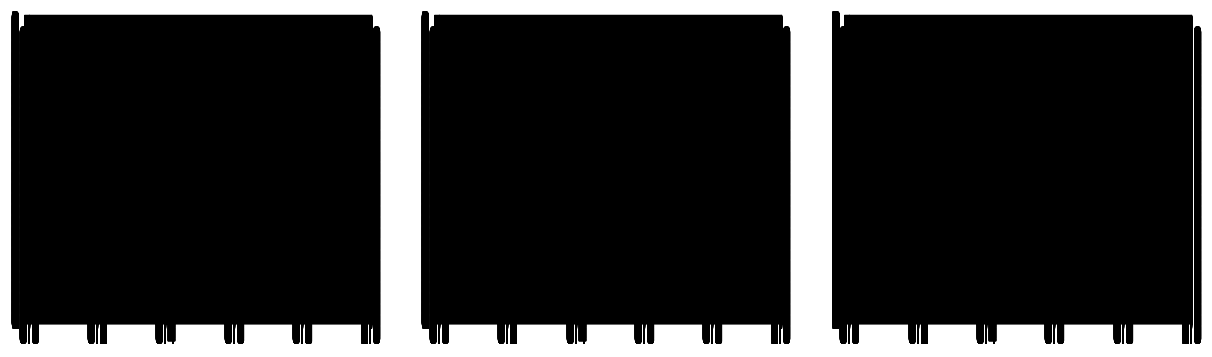

In [25]:
fig, ax1=plt.subplots(len(df_eval_route_numerical),3)
ax2 = ax1.ravel()

for i in list(range(0,len(df_eval_route_numerical)*3,3)):
  j=i+1
  k=j+1
  fig.set_figheight(4)
  fig.set_figwidth(15)
  plt.subplots_adjust(hspace=0.3)
  sns.histplot(df_eval_route[df_eval_route_numerical[i//3]], kde=True, ax=ax2[i],stat='percent')
  sns.histplot(df_eval_route[df_eval_route_numerical[i//3]], kde=True, ax=ax2[j],pmax=1)
  df_eval_route[df_eval_route_numerical[i//3]].plot(kind='box',ax=ax2[k],grid=True)